In [1]:
import random
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, RepeatVector
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt


def generate_pairs():
    pairs = []
    for i in range(100):
        for j in range(100):
            if random.random() < 0.5:
                operation = '+'
                if(i+j>=0):
                    answer = "+"+str(i+j)
                else:
                    answer = str(i+j)
            else:
                operation = '-'
                if(i-j>=0):
                    answer = "+"+str(i-j)
                else:
                    answer = str(i-j)
            query = str(i) + operation + str(j)
            query = query.ljust(5)
            answer = answer.ljust(4, ' ')
            answer = answer.rjust(3, '+')
            pairs.append((query, answer))
    return pairs


def generate_reverse_pairs():
    pairs = []
    for i in range(100):
        for j in range(100):
            if random.random() < 0.5:
                operation = '+'
                if(i+j>=0):
                    answer = "+"+str(i+j)
                else:
                    answer = str(i+j)
            else:
                operation = '-'
                if(i-j>=0):
                    answer = "+"+str(i-j)
                else:
                    answer = str(i-j)
            query = str(i) + operation + str(j)
            query = query.ljust(5)
            answer = answer.ljust(4, ' ')
            answer = answer.rjust(3, '+')
            query = query[::-1]
            answer = answer[::-1]
            pairs.append((query, answer))
    return pairs

def encode_string(string):
    alphabet = ['0','1','2','3','4','5','6','7','8','9','+','-',' ']
    encoding = []
    for char in string:
        vector = [0]*len(alphabet)
        vector[alphabet.index(char)] = 1
        encoding.append(vector)
    return encoding


In [2]:
query = '5-20 '
encoded_query = encode_string(query)
print(encoded_query)

answer = '-15 '
encoded_answer = encode_string(answer)
print(encoded_answer)


[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]


In [3]:
pairs = generate_pairs()

In [4]:
pairs

[('0+0  ', '+0  '),
 ('0+1  ', '+1  '),
 ('0+2  ', '+2  '),
 ('0+3  ', '+3  '),
 ('0+4  ', '+4  '),
 ('0+5  ', '+5  '),
 ('0-6  ', '-6  '),
 ('0+7  ', '+7  '),
 ('0-8  ', '-8  '),
 ('0+9  ', '+9  '),
 ('0-10 ', '-10 '),
 ('0-11 ', '-11 '),
 ('0+12 ', '+12 '),
 ('0+13 ', '+13 '),
 ('0+14 ', '+14 '),
 ('0-15 ', '-15 '),
 ('0-16 ', '-16 '),
 ('0+17 ', '+17 '),
 ('0-18 ', '-18 '),
 ('0-19 ', '-19 '),
 ('0-20 ', '-20 '),
 ('0+21 ', '+21 '),
 ('0-22 ', '-22 '),
 ('0-23 ', '-23 '),
 ('0-24 ', '-24 '),
 ('0-25 ', '-25 '),
 ('0-26 ', '-26 '),
 ('0+27 ', '+27 '),
 ('0-28 ', '-28 '),
 ('0-29 ', '-29 '),
 ('0-30 ', '-30 '),
 ('0+31 ', '+31 '),
 ('0-32 ', '-32 '),
 ('0-33 ', '-33 '),
 ('0-34 ', '-34 '),
 ('0+35 ', '+35 '),
 ('0+36 ', '+36 '),
 ('0+37 ', '+37 '),
 ('0-38 ', '-38 '),
 ('0-39 ', '-39 '),
 ('0-40 ', '-40 '),
 ('0+41 ', '+41 '),
 ('0+42 ', '+42 '),
 ('0+43 ', '+43 '),
 ('0+44 ', '+44 '),
 ('0+45 ', '+45 '),
 ('0+46 ', '+46 '),
 ('0+47 ', '+47 '),
 ('0-48 ', '-48 '),
 ('0-49 ', '-49 '),


In [5]:
encoded_pairs = [(encode_string(pair[0]), encode_string(pair[1])) for pair in pairs]

In [6]:
encoded_pairs[0]

([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [7]:
X = np.array([q[0] for q in encoded_pairs])
y = np.array([q[1] for q in encoded_pairs])

In [8]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, random_state=42)

In [10]:
model = Sequential()
model.add(LSTM(128, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Above network implements an Encoder-Decoder LSTM network by stacking two LSTM layers. The first LSTM layer acts as the encoder, which takes the input sequence of length 5 and converts it into a fixed-length vector representation. The second LSTM layer acts as the decoder, which takes the fixed-length vector representation generated by the encoder and produces the output sequence of length 4. The RepeatVector layer repeats the fixed-length vector representation 4 times so that it can be used as input to the second LSTM layer. Finally, a Dense layer with softmax activation is used to produce the output sequence.

In [11]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
113/113 [==============================] - 8s 30ms/step - loss: 1.8942 - accuracy: 0.3853 - val_loss: 1.4147 - val_accuracy: 0.5035
Epoch 2/50
113/113 [==============================] - 2s 18ms/step - loss: 1.3473 - accuracy: 0.5111 - val_loss: 1.3079 - val_accuracy: 0.5200
Epoch 3/50
113/113 [==============================] - 2s 19ms/step - loss: 1.2791 - accuracy: 0.5358 - val_loss: 1.2525 - val_accuracy: 0.5510
Epoch 4/50
113/113 [==============================] - 2s 16ms/step - loss: 1.2193 - accuracy: 0.5587 - val_loss: 1.1936 - val_accuracy: 0.5667
Epoch 5/50
113/113 [==============================] - 2s 18ms/step - loss: 1.1590 - accuracy: 0.5743 - val_loss: 1.1418 - val_accuracy: 0.5810
Epoch 6/50
113/113 [==============================] - 2s 17ms/step - loss: 1.0820 - accuracy: 0.6092 - val_loss: 1.0534 - val_accuracy: 0.6318
Epoch 7/50
113/113 [==============================] - 2s 18ms/step - loss: 1.0359 - accuracy: 0.6286 - val_loss: 1.0474 - val_accuracy: 0.6125

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', test_acc)

47/47 [==============================] - 0s 7ms/step - loss: 0.5631 - accuracy: 0.7850
Test accuracy: 0.7850000262260437


In [13]:
# # plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Test'], loc='upper left')
# plt.show()

In [14]:
reverse_pairs = generate_reverse_pairs()

In [15]:
reverse_pairs

[('  0-0', '  0+'),
 ('  1-0', '  1-'),
 ('  2+0', '  2+'),
 ('  3+0', '  3+'),
 ('  4-0', '  4-'),
 ('  5+0', '  5+'),
 ('  6-0', '  6-'),
 ('  7+0', '  7+'),
 ('  8+0', '  8+'),
 ('  9-0', '  9-'),
 (' 01-0', ' 01-'),
 (' 11-0', ' 11-'),
 (' 21+0', ' 21+'),
 (' 31+0', ' 31+'),
 (' 41-0', ' 41-'),
 (' 51+0', ' 51+'),
 (' 61+0', ' 61+'),
 (' 71-0', ' 71-'),
 (' 81-0', ' 81-'),
 (' 91-0', ' 91-'),
 (' 02+0', ' 02+'),
 (' 12+0', ' 12+'),
 (' 22+0', ' 22+'),
 (' 32+0', ' 32+'),
 (' 42+0', ' 42+'),
 (' 52+0', ' 52+'),
 (' 62+0', ' 62+'),
 (' 72-0', ' 72-'),
 (' 82+0', ' 82+'),
 (' 92-0', ' 92-'),
 (' 03-0', ' 03-'),
 (' 13-0', ' 13-'),
 (' 23+0', ' 23+'),
 (' 33+0', ' 33+'),
 (' 43+0', ' 43+'),
 (' 53+0', ' 53+'),
 (' 63+0', ' 63+'),
 (' 73+0', ' 73+'),
 (' 83-0', ' 83-'),
 (' 93+0', ' 93+'),
 (' 04+0', ' 04+'),
 (' 14-0', ' 14-'),
 (' 24-0', ' 24-'),
 (' 34+0', ' 34+'),
 (' 44-0', ' 44-'),
 (' 54-0', ' 54-'),
 (' 64+0', ' 64+'),
 (' 74+0', ' 74+'),
 (' 84-0', ' 84-'),
 (' 94-0', ' 94-'),


In [16]:
encoded_reverse_pairs = [(encode_string(pair[0]), encode_string(pair[1])) for pair in reverse_pairs]

In [17]:
X_rev = np.array([q[0] for q in encoded_reverse_pairs])
y_rev = np.array([q[1] for q in encoded_reverse_pairs])

In [18]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_rev, y_rev, test_size=0.15, random_state=42)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, random_state=42)

In [20]:
model = Sequential()
model.add(LSTM(128, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_rev = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
113/113 [==============================] - 9s 31ms/step - loss: 1.8522 - accuracy: 0.3926 - val_loss: 1.3661 - val_accuracy: 0.5180
Epoch 2/50
113/113 [==============================] - 2s 18ms/step - loss: 1.3123 - accuracy: 0.5265 - val_loss: 1.3176 - val_accuracy: 0.5118
Epoch 3/50
113/113 [==============================] - 2s 18ms/step - loss: 1.2633 - accuracy: 0.5404 - val_loss: 1.2377 - val_accuracy: 0.5524
Epoch 4/50
113/113 [==============================] - 2s 18ms/step - loss: 1.2140 - accuracy: 0.5550 - val_loss: 1.1722 - val_accuracy: 0.5625
Epoch 5/50
113/113 [==============================] - 2s 17ms/step - loss: 1.1408 - accuracy: 0.5825 - val_loss: 1.1210 - val_accuracy: 0.5845
Epoch 6/50
113/113 [==============================] - 2s 19ms/step - loss: 1.0697 - accuracy: 0.6151 - val_loss: 1.0267 - val_accuracy: 0.6445
Epoch 7/50
113/113 [==============================] - 2s 20ms/step - loss: 1.0141 - accuracy: 0.6404 - val_loss: 0.9930 - val_accuracy: 0.6418

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', test_acc)

47/47 [==============================] - 0s 7ms/step - loss: 0.2790 - accuracy: 0.9078
Test accuracy: 0.9078333377838135


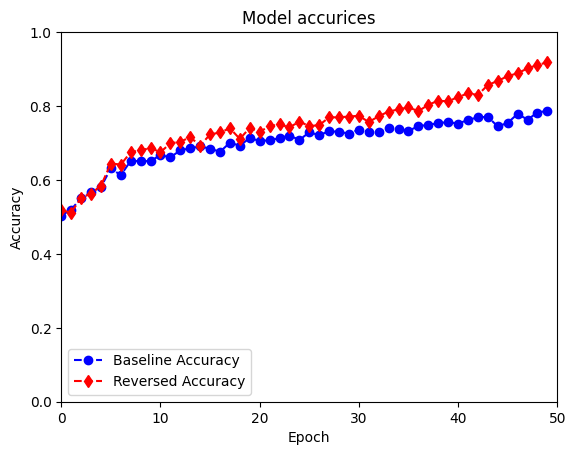

In [30]:
plt.plot(history.history['val_accuracy'],'--bo')
plt.plot(history_rev.history['val_accuracy'],'--rd')
plt.xlim([0, 50])
plt.ylim([0, 1])
plt.title('Model accurices')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Baseline Accuracy', 'Reversed Accuracy'], loc='lower left')
plt.show()